In [32]:
############################## CMSC828C PROJECT 2 #######################################################
# Code : SVM for classification of fashion MNIST 
# Author : Saket Seshadri Gudimetla Hanumath
# UID : 116332293
######################################################################################################
# Importing NECESSARY LIBRARIES for part 1
import numpy as np
import mnist_reader
import matplotlib.pyplot as plt
import math
import time

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

D:\Anaconda3\envs\ml\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [33]:
def load_dataset():    
    # loading the train and test variables
    X_train, y_train = mnist_reader.load_mnist('fashion-mnist-master/data/fashion', kind='train')
    X_test, y_test = mnist_reader.load_mnist('fashion-mnist-master/data/fashion', kind='t10k')
    
    print("X_train shape: ", X_train.shape)
    print("y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_test shape: ", y_test.shape) 
    
    return X_train, y_train, X_test, y_test    

In [43]:
def preprocess_data(X_train, X_test, y_train, Pca=0):
    # convert from int to flot
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    # normalize
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    if(Pca == 0):
        # reduce dimensions with LDA
        lda = LinearDiscriminantAnalysis()

        X_train = lda.fit_transform(X_train, y_train)
        print("X_train shape after LDA : ", X_train.shape)

        X_test = lda.transform(X_test)
        print("X_test after LDA : ", X_test.shape)
    else:
        # number of parameters that are responsible for var% of total variance
        pca = PCA(0.90)

        X_train = pca.fit_transform(X_train)
        print("X_train shape after PCA : ", X_train.shape)
        
        X_test = pca.transform(X_test)
        print("X_test after PCA : ", X_test.shape)
        
    return X_train, X_test

In [40]:
def pred_acc(y_test, y_pred):    
    comparison = 0
    for i in range(0, len(y_pred)):
        if y_pred[i] == y_test[i]:
            comparison += 1
    accuracy = comparison/len(y_pred)
    accuracy = accuracy*100
    return accuracy

## LDA

In [41]:
X_train, y_train, X_test, y_test = load_dataset()
X_train, X_test = preprocess_data(X_train, X_test, y_train)

X_train shape:  (60000, 784)
y_train shape:  (60000,)
X_test shape:  (10000, 784)
y_test shape:  (10000,)
X_train shape after LDA :  (60000, 9)
X_test after LDA :  (10000, 9)


In [31]:
def model_svm(X_train, y_train, X_test, y_test, kernel, degree=1, gamma='auto', C=1):
#     print("C-{}".format(C))
    if(kernel == 'poly'):
        svm = SVC(kernel=kernel, degree=degree, gamma='auto')
    elif(kernel == 'rbf'):
        svm = SVC(kernel=kernel, gamma=gamma, C=C)
    else:
        svm = SVC(kernel=kernel, C=C)
    
    %time svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    acc_test = pred_acc(y_test, y_pred)
    
    y_pred = svm.predict(X_train)
    acc_train = pred_acc(y_train, y_pred)
    return acc_test, acc_train

Linear Kernel 

In [19]:
# linear kernel
kernel = 'linear'
acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel)
print("test acc : ", acc_test)
print("train acc : ", acc_train)
# Acc for linear kernel
# Test - 82.51%
# Train - 84.38%

C-1
Wall time: 20.6 s
test acc :  82.50999999999999
train acc :  84.38333333333333


Regularization Parameter tuning

In [22]:
# testing out the linear kernel for different values of C
C_list = [0.01, 0.1, 0.5, 1, 10, 50]
kernel = 'linear'
acc_list_C = []
for c in C_list:
    acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel, 1, 'auto', c)
    a = [acc_test, acc_train]
    acc_list_C.append(a)
print(acc_list_C)

C-0.01
Wall time: 9.96 s
C-0.1
Wall time: 10.9 s
C-0.5
Wall time: 16.4 s
C-1
Wall time: 20.6 s
C-10
Wall time: 1min 6s
C-50
Wall time: 3min 38s
[[82.55, 84.30666666666666], [82.52000000000001, 84.35166666666667], [82.54, 84.38166666666666], [82.50999999999999, 84.38333333333333], [82.53, 84.37833333333333], [82.52000000000001, 84.38166666666666]]


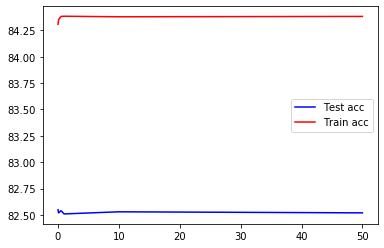

In [24]:
# plotting the impact of C on kernel
test_acc_C = []
train_acc_C = []
for a in acc_list_C:
    test_acc_C.append(a[0])
    train_acc_C.append(a[1])

# plt.figure(figsize=(8, 8))
plt.plot(C_list, test_acc_C, color = 'b', label='Test acc')
plt.plot(C_list, train_acc_C, color = 'r', label='Train acc')

plt.legend(loc='best')
plt.show()

Polynomial Kernel

In [8]:
# polynomial kernel
kernel = 'poly'
degrees = [0, 1, 2, 3, 4, 5, 6]
acc_list = []
for deg in degrees:
    acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel, deg)
    a = [acc_test, acc_train]
    acc_list.append(a)
print(acc_list)

Wall time: 1min 40s
Wall time: 12.9 s
Wall time: 17 s
Wall time: 30.5 s
Wall time: 1min 5s
Wall time: 4min 22s
Wall time: 20min 28s
[[10.0, 10.0], [82.52000000000001, 84.35833333333333], [82.89, 84.68333333333334], [83.37, 85.67833333333333], [82.22, 86.34666666666668], [81.85, 87.76333333333334], [80.21000000000001, 89.25333333333333]]


Accuracy vs model complexity(degree of poly)

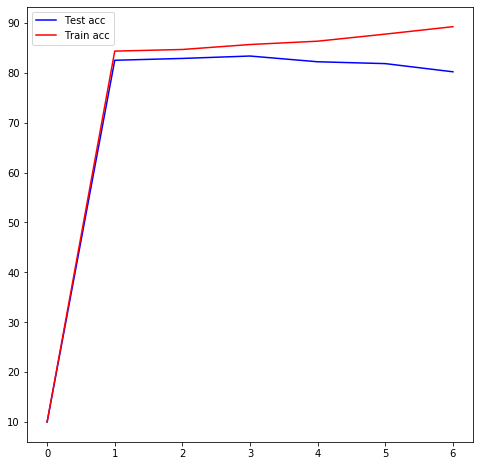

In [9]:
test_acc = []
train_acc = []
for a in acc_list:
    test_acc.append(a[0])
    train_acc.append(a[1])

# plt.figure(figsize=(8, 8))
plt.plot(degrees, test_acc, color = 'b', label='Test acc')
plt.plot(degrees, train_acc, color = 'r', label='Train acc')

plt.legend(loc='best')
plt.show()

# degree = 3 makes sense here. After deg=3 the diff between train and test acc start to rise with
# training acc increasing and that of test decreasing which may cause over fitting if the trend is 
# continued. 

# For poly svm deg = 3
# Train acc - 85.68%
# Test acc - 83.37%

RBF Kernel

In [11]:
# RBF kernel
kernel = 'rbf'
acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel, deg)
print("test acc : ", acc_test)
print("train acc : ", acc_train)

# best accuracies overall
# test - 83.71%
# train - 86.545%

Wall time: 20.2 s
test acc :  83.71
train acc :  86.545


Tuning gamma 

In [27]:
# testing out different values of gamma 
gammas = [0.1, 0.3, 0.6, 1, 3]
acc_list_gamma = []
for gamma in gammas:
    acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel, deg, gamma)
    a = [acc_test, acc_train]
    acc_list_gamma.append(a)

C-1
Wall time: 21.4 s
C-1
Wall time: 38.8 s
C-1
Wall time: 1min 19s
C-1
Wall time: 3min 14s
C-1
Wall time: 8min 38s


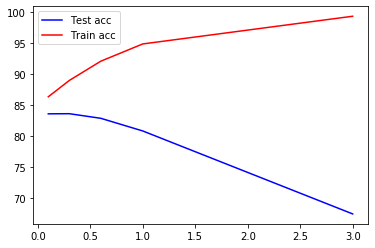

[83.62, 83.64, 82.89999999999999, 80.86, 67.5]
[86.36500000000001, 88.99000000000001, 92.09333333333333, 94.875, 99.335]


In [30]:
test_acc_gamma = []
train_acc_gamma = []
for a in acc_list_gamma:
    test_acc_gamma.append(a[0])
    train_acc_gamma.append(a[1])

plt.plot(gammas, test_acc_gamma, color = 'b', label='Test acc')
plt.plot(gammas, train_acc_gamma, color = 'r', label='Train acc')

plt.legend(loc='best')
plt.show()
print(test_acc_gamma)
print(train_acc_gamma)

# higher values of gamma tend to overfit the model 
# gamma = 0.3
# test acc - 83.64%
# train acc - 88.99%

In [25]:
# looking at the impact of C on accuracy
C_list = [0.1, 0.5, 1, 10, 50]
kernel = 'rbf'
gamma = 0.3
deg = 3
acc_list_C = []
for c in C_list:
    acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel, deg, gamma, c)
    a = [acc_test, acc_train]
    acc_list_C.append(a)
print(acc_list_C)

C-0.1
Wall time: 48.4 s
C-0.5
Wall time: 36.5 s
C-1
Wall time: 39.7 s
C-10
Wall time: 47 s
C-50
Wall time: 1min
[[82.58, 85.40333333333334], [83.37, 87.69500000000001], [83.64, 88.99000000000001], [82.56, 94.17333333333333], [81.0, 97.16333333333334]]


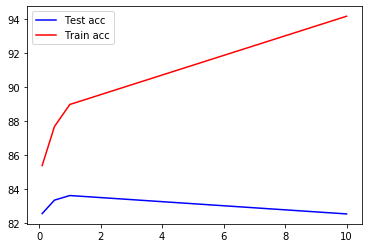

In [28]:
test_acc_C = []
train_acc_C = []
for a in acc_list_C:
    test_acc_C.append(a[0])
    train_acc_C.append(a[1])

plt.plot(C_list[:4], test_acc_C[:4], color = 'b', label='Test acc')
plt.plot(C_list[:4], train_acc_C[:4], color = 'r', label='Train acc')

plt.legend(loc='best')
plt.show()
# best performance at C = 1
# test acc - 83.64%
# train acc - 88.99%

## PCA

In [44]:
X_train, y_train, X_test, y_test = load_dataset()
X_train, X_test = preprocess_data(X_train, X_test, y_train, Pca=1)

X_train shape:  (60000, 784)
y_train shape:  (60000,)
X_test shape:  (10000, 784)
y_test shape:  (10000,)
X_train shape after PCA :  (60000, 84)
X_test after PCA :  (10000, 84)


Linear Kernel

In [45]:
kernel = 'linear'
acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel)
print("test acc : ", acc_test)
print("train acc : ", acc_train)

Wall time: 1min 49s
test acc :  84.93
train acc :  86.685


Polynomial Kernel

In [46]:
kernel = 'poly'
deg = 3
acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel, deg)
print("test acc : ", acc_test)
print("train acc : ", acc_train)

Wall time: 1min 48s
test acc :  86.16
train acc :  88.225


RBF kernel

In [50]:
kernel = 'rbf'
acc_test, acc_train = model_svm(X_train, y_train, X_test, y_test, kernel)
print("test acc : ", acc_test)
print("train acc : ", acc_train)

Wall time: 1min 24s
test acc :  87.83999999999999
train acc :  89.84166666666667
